In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from scipy import stats
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12, 10)})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['breed_labels.csv', 'color_labels.csv', 'state_labels.csv', 'test', 'test.zip', 'train', 'train.zip']


In [2]:
train_df = pd.read_csv('./input/train/train.csv')
test_df = pd.read_csv('./input/test/test.csv')
train_df['dataset_type'] = 'train'
test_df['dataset_type'] = 'test'
all_data = pd.concat([train_df, test_df])
train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,train
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,train
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,train
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,train


### Data Fields  
* PetID - Unique hash ID of pet profile
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* Type - Type of animal (1 = Dog, 2 = Cat)
* Name - Name of pet (Empty if not named)
* Age - Age of pet when listed, in months
* Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
* Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
* Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
* Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* Quantity - Number of pets represented in profile
* Fee - Adoption fee (0 = Free)
* State - State location in Malaysia (Refer to StateLabels dictionary)
* RescuerID - Unique hash ID of rescuer
* VideoAmt - Total uploaded videos for this pet
* PhotoAmt - Total uploaded photos for this pet
* Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

In [3]:
print(train_df.shape)
print(test_df.shape)

(14993, 25)
(3948, 24)


In [4]:
display(train_df.describe())
display(train_df.info())

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

None

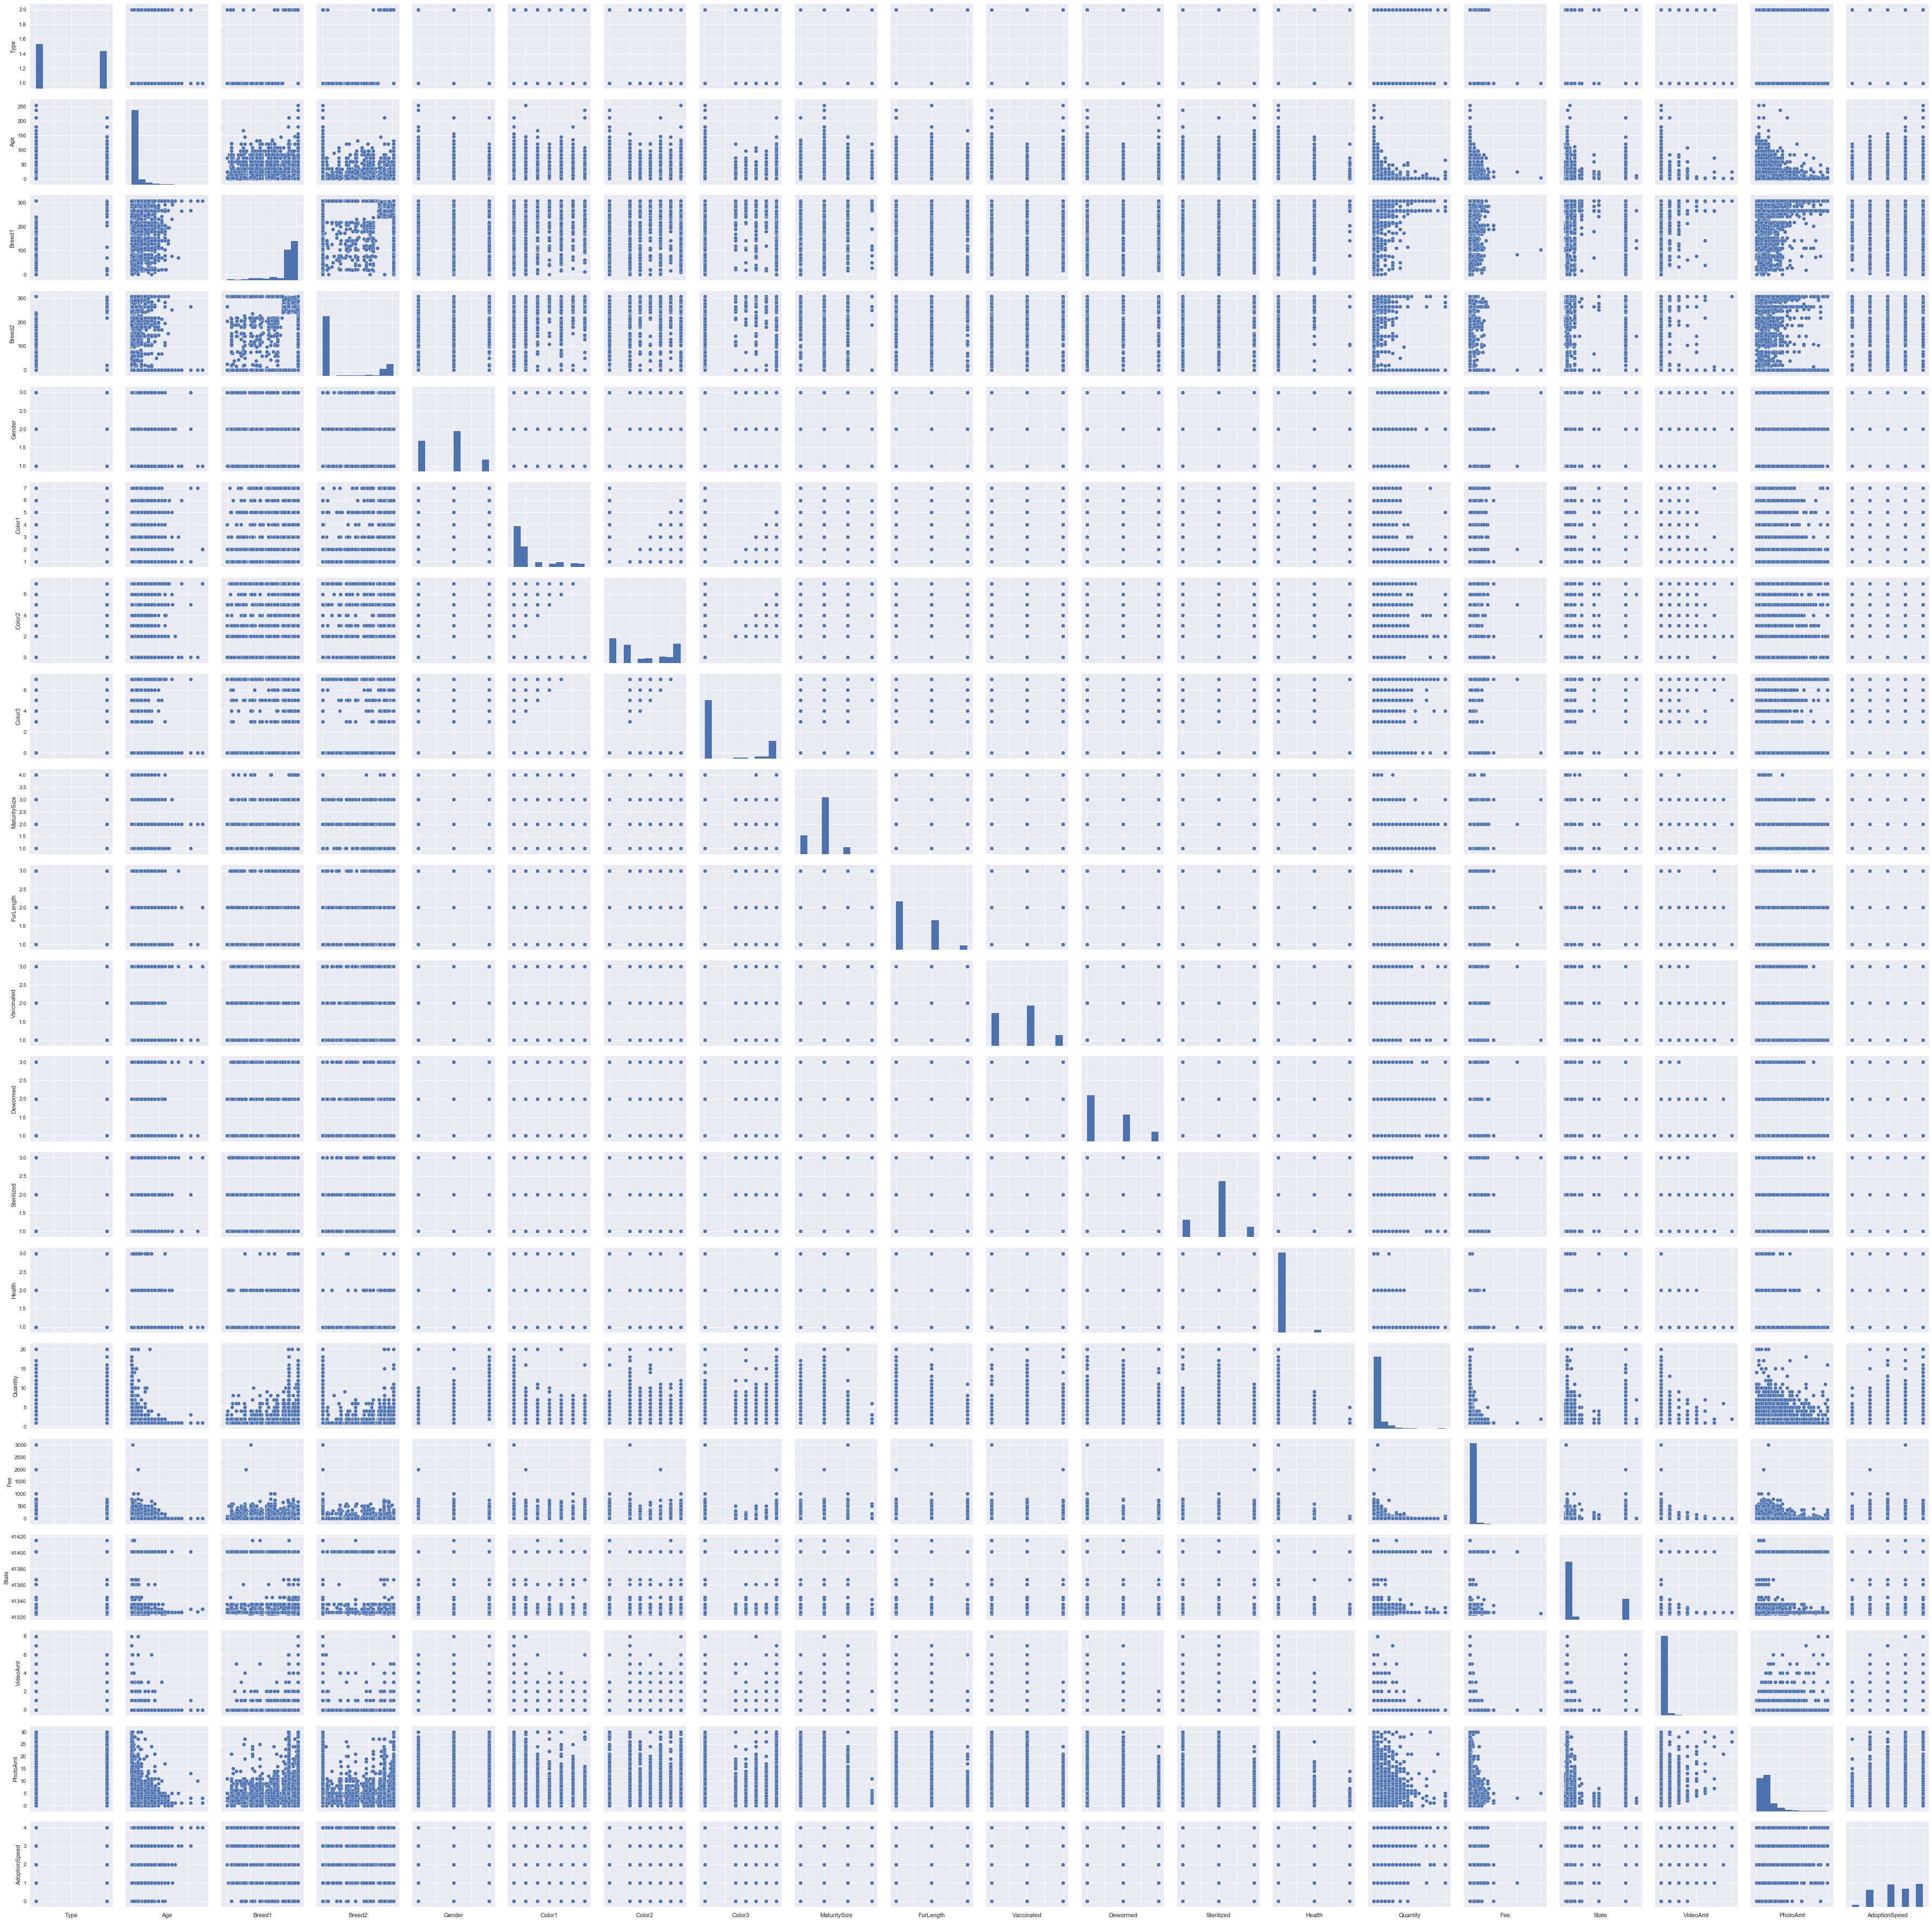

In [5]:
g = sns.pairplot(train_df)
g.set(xticklabels=[])

### AdoptionSpeed  
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:   
0 - Pet was adopted on the same day as it was listed.   
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.   
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.   
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.  
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

Text(0.5,1,'Adoption Speed (Target)')

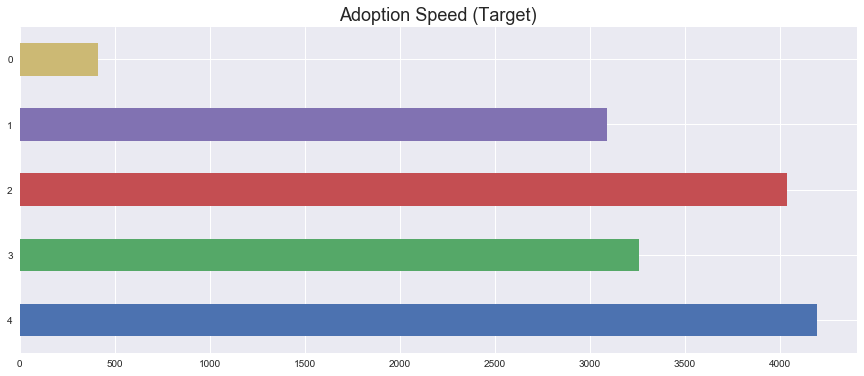

In [6]:
train_df['AdoptionSpeed'].value_counts().sort_index(ascending=False).plot(kind='barh', 
                                                                          figsize=(15,6))
plt.title('Adoption Speed (Target)', fontsize=18)

In [7]:
train_df.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dataset_type        0
dtype: int64

Text(0.5,1,'Type(test)')

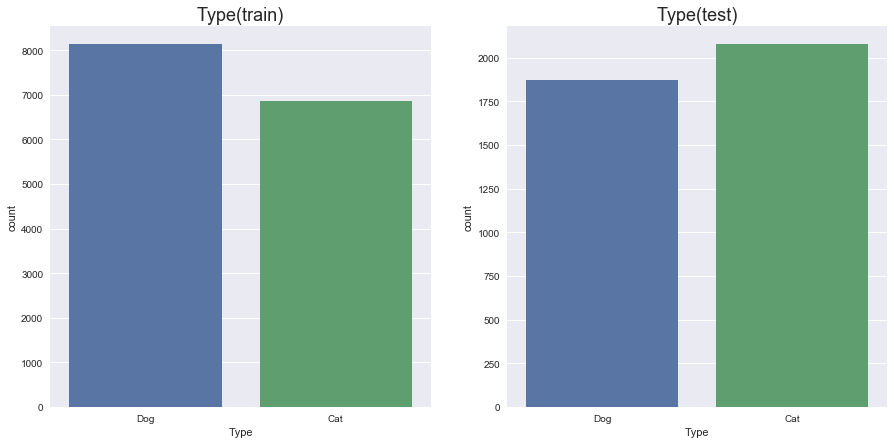

In [8]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='Type', data=train_df).set(xticklabels=['Dog', 'Cat'])
plt.title('Type(train)', fontsize=18)

plt.subplot(122)
sns.countplot(x='Type', data=test_df).set(xticklabels=['Dog', 'Cat'])
plt.title('Type(test)', fontsize=18)

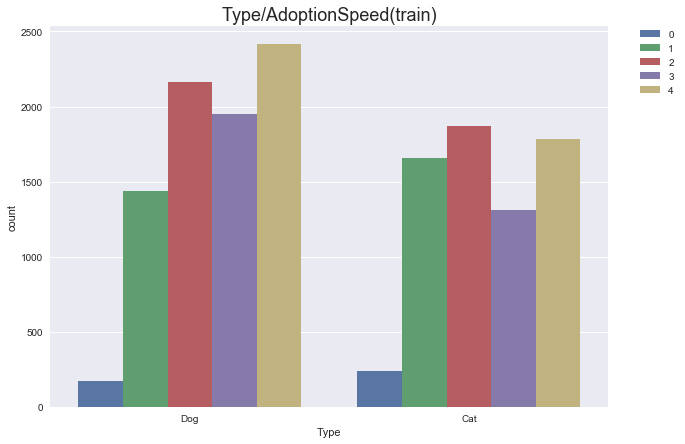

In [9]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Type', data=train_df, hue="AdoptionSpeed").set(xticklabels=['Dog', 'Cat'])
plt.title('Type/AdoptionSpeed(train)', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

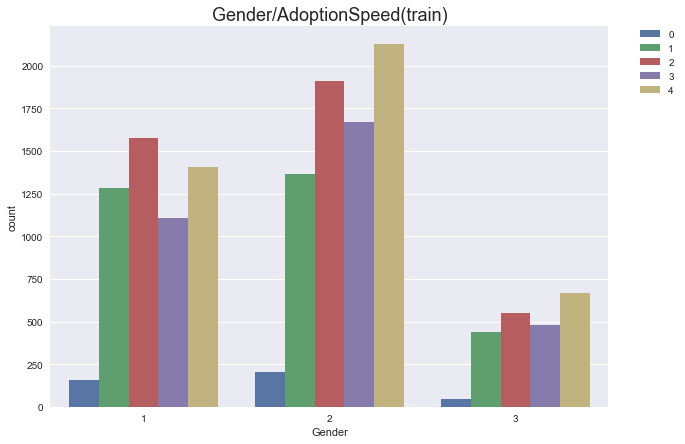

In [10]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Gender', data=train_df, hue="AdoptionSpeed")
plt.title('Gender/AdoptionSpeed(train)', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

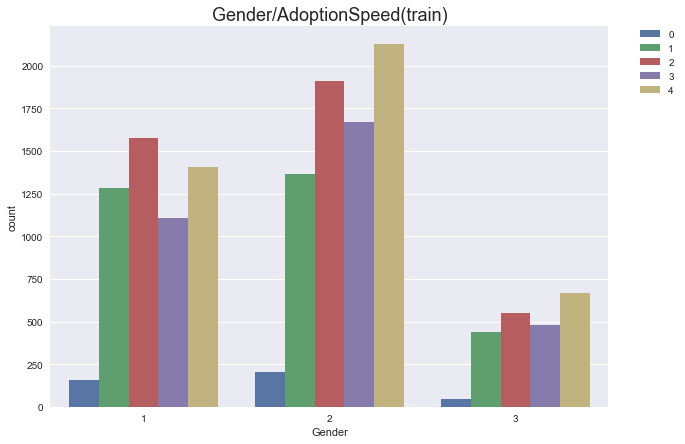

In [11]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Gender', data=train_df, hue="AdoptionSpeed")
plt.title('Gender/AdoptionSpeed(train)', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\Shakhrai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


3.762974927547767

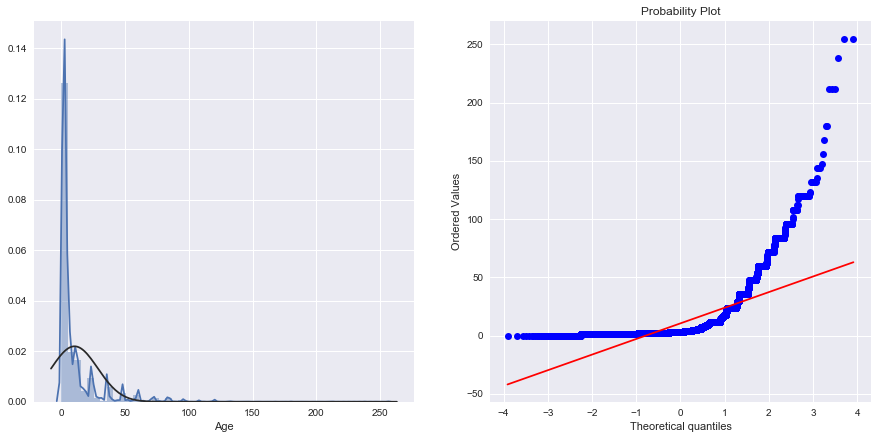

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(train_df['Age'], fit=norm)

plt.subplot(122)
res = stats.probplot(train_df['Age'], plot=plt)

display(train_df['Age'].skew())

C:\Users\Shakhrai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.9474771865069215

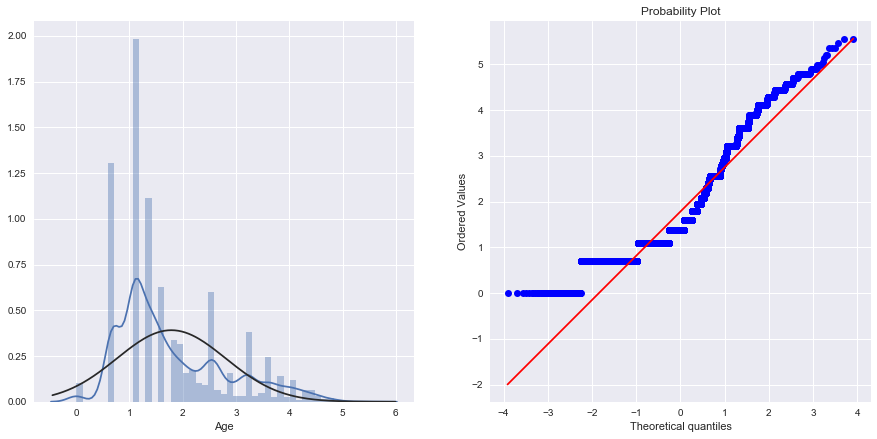

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(np.log1p(train_df['Age']), fit=norm)

plt.subplot(122)
res = stats.probplot(np.log1p(train_df['Age']), plot=plt)

display(np.log1p(train_df['Age']).skew())

C:\Users\Shakhrai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


2.860638032400066

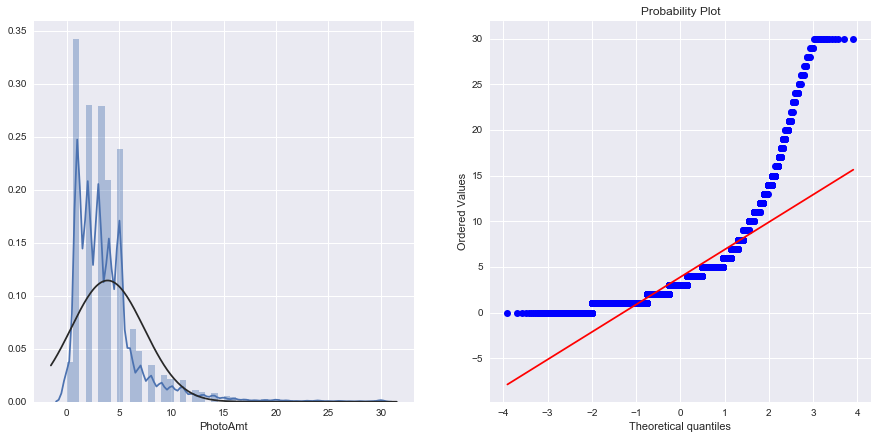

In [14]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot((train_df['PhotoAmt']), fit=norm)

plt.subplot(122)
res = stats.probplot((train_df['PhotoAmt']), plot=plt)

display((train_df['PhotoAmt']).skew())

C:\Users\Shakhrai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.25293379687381223

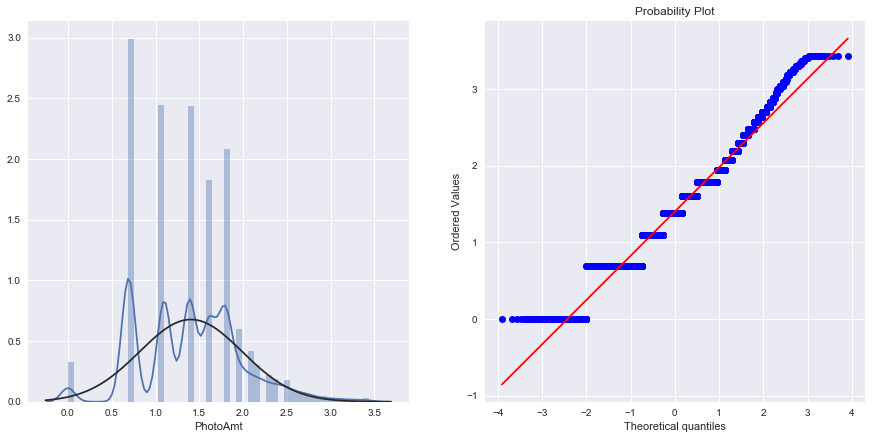

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(np.log1p(train_df['PhotoAmt']), fit=norm)

plt.subplot(122)
res = stats.probplot(np.log1p(train_df['PhotoAmt']), plot=plt)

display(np.log1p(train_df['PhotoAmt']).skew())

In [46]:
train_df.Breed1.value_counts().head(10)

307    5927
266    3634
265    1258
299     342
264     296
292     264
285     221
141     205
205     190
179     167
Name: Breed1, dtype: int64

In [47]:
train_df.Breed2.value_counts().head(10)

0      10762
307     1727
266      599
265      321
299      138
264      125
292      105
218       91
141       86
285       78
Name: Breed2, dtype: int64

In [18]:
train_df_num = train_df.drop(columns = train_df.dtypes[train_df.dtypes=='object'].index)

In [19]:
test_df_num = test_df.drop(columns = test_df.dtypes[test_df.dtypes=='object'].index)

In [20]:
train_df_num.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2


In [21]:
train_df_num.shape

(14993, 20)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, cohen_kappa_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

In [23]:
def metric(y1,y2):
    return cohen_kappa_score(y1,y2, weights='quadratic')

# Make scorer for scikit-learn
scorer = make_scorer(metric)

In [24]:
x = train_df_num.iloc[:,:19]
y = train_df_num.AdoptionSpeed

In [25]:
x_tst = test_df_num.iloc[:,:19]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0, shuffle=True)

In [27]:
X_train.shape, X_test.shape, x_tst.shape

((13493, 19), (1500, 19), (3948, 19))

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,\
                            ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
RANDOM_STATE = 0

In [29]:
classifiers = [KNeighborsClassifier(metric='manhattan', n_neighbors=52),
               KNeighborsClassifier(metric='manhattan', n_neighbors=118),
               KNeighborsClassifier(metric='chebyshev', n_neighbors=141),
               KNeighborsClassifier(metric='chebyshev', n_neighbors=94),
               KNeighborsClassifier(metric='euclidean', n_neighbors=27),
               KNeighborsClassifier(metric='euclidean', n_neighbors=86),
               LogisticRegression(C=32, penalty='l1', class_weight=None, fit_intercept=True, max_iter=150, tol=0.1),
               LogisticRegression(C=0.005, penalty='l1', class_weight=None, fit_intercept=False, max_iter=100, tol=0.01),
               LogisticRegression(C=0.0001, penalty='l2', class_weight=None, fit_intercept=True, max_iter=150, tol=1e-06),
               LogisticRegression(C=96, penalty='l1', class_weight='balanced', fit_intercept=True, max_iter=50, tol=0.0001),
               LogisticRegression(C=54, penalty='l2', class_weight='balanced', fit_intercept=False, max_iter=450, tol=0.001),
               GradientBoostingClassifier(n_estimators=50, learning_rate=0.005, max_depth=12, max_features=0.8, min_samples_leaf=2, subsample=0.2),
               GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=5, max_features=0.6, min_samples_leaf=10, subsample=0.8),
               GradientBoostingClassifier(n_estimators=200, learning_rate=0.001, max_depth=90, max_features=0.5, min_samples_leaf=20, subsample=0.2),
               GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=20, max_features=0.6, min_samples_leaf=24, subsample=0.7),
               GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=90, max_features=0.5, min_samples_leaf=20, subsample=0.2),
               RandomForestClassifier(),
               RandomForestClassifier(n_estimators=225, bootstrap=True, max_depth=83, max_features='auto', min_samples_leaf=5, min_samples_split=5),
               ExtraTreesClassifier(),
               ExtraTreesClassifier(n_estimators=200, bootstrap=False, max_depth=80, max_features='auto', min_samples_leaf=6, min_samples_split=5),
               AdaBoostClassifier(),
               AdaBoostClassifier(n_estimators=225, algorithm='SAMME.R', learning_rate=0.2),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(criterion='entropy', max_depth=110, max_features='auto', min_samples_leaf=6, min_samples_split=330)
               ]
classifiers_names = ['knn1', 'knn2', 'knn3', 'knn4', 'knn5', 'knn6',
                     'lr1', 'lr2', 'lr3', 'lr4', 
                     'gb1', 'gb2', 'gb3', 'gb4', 'gb5', 
                     'rf1', 'rf2',
                     'et1', 'et2', 
                     'adb1', 'adb2',
                     'dt1','dt2',
                    ]

In [30]:
classifiers_predictions = pd.DataFrame()
for name, classifier in zip(classifiers_names, classifiers):
    classifier.fit(X_train, y_train)
    train_predictions = pd.Series(classifier.predict(X_train))
    test_predictions = classifier.predict(X_test)
    
    classifiers_predictions[name] = test_predictions
    print('{0}: ({1} - {2})'.format(name,
                                    cohen_kappa_score(y_train, train_predictions, weights='quadratic') ,
                                    cohen_kappa_score(y_test, test_predictions, weights='quadratic')))

knn1: (0.30428842586497307 - 0.2784864886240176)
knn2: (0.2844141349212519 - 0.27444179187834505)
knn3: (0.25890371485769126 - 0.27186555936611)
knn4: (0.2690014678031222 - 0.24542517074449033)
knn5: (0.31718436144349893 - 0.2732729595189868)
knn6: (0.2818885061231685 - 0.2588458308820941)
lr1: (0.15173336628498002 - 0.13792605954980697)
lr2: (0.13512502473243726 - 0.12708565798330673)
lr3: (0.18567431621107044 - 0.18040288894034684)
lr4: (0.210037562236714 - 0.2098102862754191)
gb1: (0.030491676179441374 - 0.03465034808785272)
gb2: (0.520999295320891 - 0.31857390151134557)
gb3: (0.3228798376281382 - 0.3210838243843477)
gb4: (0.3469653511170062 - 0.2814501979847407)
gb5: (0.46763972463963543 - 0.32946061747283106)
rf1: (0.44972674995620887 - 0.316881536604008)
rf2: (0.9682933518464248 - 0.2950236735204538)
et1: (0.607478022306087 - 0.3187142308830825)
et2: (0.9848777091556431 - 0.29127492723197934)
adb1: (0.5411583830460643 - 0.27835391279493926)
adb2: (0.3328140784455036 - 0.319561370

In [31]:
classifiers_predictions = classifiers_predictions[['knn1', 'knn2', 'knn3', 'knn4', 'knn5', 'knn6',
                     'lr1', 'lr2', 'lr3', 'lr4', 
                     'gb1', 'gb2', 'gb3', 'gb4', 'gb5', 
                     'rf1', 'rf2',
                     'et1', 'et2', 
                     'adb1', 'adb2',
                     'dt1','dt2',
                    ]]

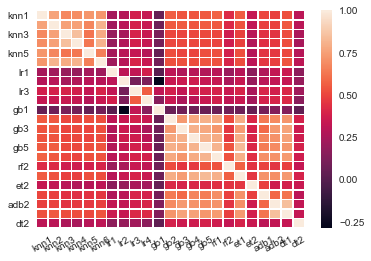

In [32]:
sns.heatmap(classifiers_predictions.corr(), linewidths=.5);
plt.yticks(rotation=0);
plt.xticks(rotation=30);
sns.set(font_scale=2)

In [33]:
min_correlation = np.argwhere(np.asarray(classifiers_predictions.corr()) < 0.8)
selected_classifiers = list()
for x, y in min_correlation:
    selected_classifiers.append(classifiers_predictions.columns[x])
    selected_classifiers.append(classifiers_predictions.columns[y])
selected_classifiers = set(selected_classifiers)
selected_classifiers

{'adb1',
 'adb2',
 'dt1',
 'dt2',
 'et1',
 'et2',
 'gb1',
 'gb2',
 'gb3',
 'gb4',
 'gb5',
 'knn1',
 'knn2',
 'knn3',
 'knn4',
 'knn5',
 'knn6',
 'lr1',
 'lr2',
 'lr3',
 'lr4',
 'rf1',
 'rf2'}

In [34]:
def simple_blending(basic_algorithms, meta_algorithm, X_train, X_test, y_train, test_df, part1_ratio=0.9, random_state=None):
    tr = pd.DataFrame()
    tst = pd.DataFrame()
    y = pd.DataFrame()
    X_train_part1, X_train_part2,\
    y_train_part1, y_train_part2 = train_test_split(X_train, y_train, test_size=1-part1_ratio, random_state=random_state)
    
    for index, basic_algorithm in enumerate(basic_algorithms):
        #print(index)
        basic_algorithm.fit(X_train_part1, y_train_part1)

        part2_predictions = basic_algorithm.predict(X_train_part2)
        tr[index] = part2_predictions

        test_predictions = basic_algorithm.predict(X_test)
        tst[index] = test_predictions
        
        test_pred = basic_algorithm.predict(test_df)
        y[index] = test_pred
        
    meta_algorithm.fit(tr, y_train_part2)
    
    return meta_algorithm.predict(tst), meta_algorithm.predict(y)

In [35]:
r = pd.DataFrame()
experiments = list()
for i in range(1, 10):
    simple_blending_predictions, result = simple_blending(classifiers,
                                              LogisticRegression(C=5, random_state=RANDOM_STATE),
                                              X_train, X_test, y_train, x_tst,
                                              part1_ratio=0.9,
                                              random_state=i)
    r[i] = result
    #print(simple_blending_predictions)
    print(cohen_kappa_score(y_test, simple_blending_predictions, weights='quadratic'))
    experiments.append(cohen_kappa_score( y_test, simple_blending_predictions, weights='quadratic'))
print('mean kappa: {0}\nstd: {1}'.format(round(np.mean(experiments), 4), round(np.std(experiments), 5)))

0.3340627640555931
0.351692553845924
0.33533613490620795
0.33435492369493447
0.32088898405185495
0.3368386034879921
0.3410737325820029
0.3203601861017108
0.32477470848446555
mean kappa: 0.3333
std: 0.00949


In [36]:
r['avg'] = r.mean(axis=1).astype(int)
r.avg.head()

0    2
1    4
2    4
3    4
4    4
Name: avg, dtype: int32

In [37]:
def simple_blending_features(basic_algorithms, meta_algorithm, X_train, X_test, y_train, test_df, part1_ratio=0.5, random_state=None):
    tr = pd.DataFrame()
    tst = pd.DataFrame()
    y = pd.DataFrame()
    
    X_train_part1, X_train_part2,\
    y_train_part1, y_train_part2 = train_test_split(X_train, y_train, test_size=1-part1_ratio, random_state=random_state)
    
    tr = tr.append(X_train_part2)
    tst = tst.append(X_test)
    y = y.append(test_df)
    
    for index, basic_algorithm in enumerate(basic_algorithms):
        #print(index)
        basic_algorithm.fit(X_train_part1, y_train_part1)

        part2_predictions = basic_algorithm.predict(X_train_part2)
        tr[index] = part2_predictions

        test_predictions = basic_algorithm.predict(X_test)
        tst[index] = test_predictions
        
        test_pred = basic_algorithm.predict(test_df)
        y[index] = test_pred
    
    meta_algorithm.fit(tr, y_train_part2)

    return meta_algorithm.predict(tst), meta_algorithm.predict(y)

In [38]:
r2 = pd.DataFrame()
experiments = list()
for i in range(1, 10):
    simple_blending_features_predictions, result2 = simple_blending_features(classifiers,
                                              LogisticRegression(C=5, random_state=RANDOM_STATE),
                                              X_train, X_test, y_train, x_tst,
                                              part1_ratio=0.9,
                                              random_state=i)
    r2[i] = result2
    #print(simple_blending_predictions)
    print(cohen_kappa_score(y_test, simple_blending_features_predictions, weights='quadratic'))
    experiments.append(cohen_kappa_score( y_test, simple_blending_features_predictions, weights='quadratic'))
print('mean kappa: {0}\nstd: {1}'.format(round(np.mean(experiments), 4), round(np.std(experiments), 5)))

0.3132498149009638
0.32722529687231094
0.3201574731476424
0.3268606491775271
0.3355759741503819
0.3037257025673238
0.31892302422897656
0.3277742198671778
0.3256204712275639
mean kappa: 0.3221
std: 0.00885


In [39]:
r2['avg'] = r2.mean(axis=1).round(0).astype(int)
r2.avg.head()

0    2
1    4
2    4
3    4
4    4
Name: avg, dtype: int32

In [40]:
def average_blending_features(basic_algorithms, meta_algorithm, X_train, X_test, y_train, test_df, part1_ratio=0.5, n_iter=3, random_state=None):
    r = pd.DataFrame()
    simple_blending_realizations = list()
    for it in range(n_iter):
        print(it)
        if random_state is None:
            realization_random_state = None
        else:
            realization_random_state = it + random_state
        
        simple_blending_features_predictions, result2 = simple_blending_features(basic_algorithms,
                                 meta_algorithm,
                                 X_train, X_test, y_train, test_df,
                                 part1_ratio=part1_ratio,
                                 random_state=realization_random_state)
        r[it] = result2
        simple_blending_realizations.append(simple_blending_features_predictions)
    return np.mean(np.asarray(simple_blending_realizations), axis=0), r.mean(axis=1).round(0).astype(int)

In [41]:

r4 = pd.DataFrame()
experiments = list()
for i in range(1, 10):
    average_blending_features_predictions, result3 = average_blending_features(classifiers,
                                                                      LogisticRegression(C=5, random_state=RANDOM_STATE),
                                                                      X_train, X_test, y_train, x_tst,
                                                                      part1_ratio=0.5,
                                                                      n_iter=10,
                                                                      random_state=i)
    
    r4[i] = result3
    print(cohen_kappa_score(y_test, average_blending_features_predictions.round(0), weights='quadratic'))
    experiments.append(cohen_kappa_score( y_test, average_blending_features_predictions.round(0), weights='quadratic'))
print('mean kappa: {0}\nstd: {1}'.format(round(np.mean(experiments), 4), round(np.std(experiments), 5)))

0
1
2
3
4
5
6
7
8
9
0.34909621231206844
0
1
2
3
4
5
6
7
8
9
0.3473104228915763
0
1
2
3
4
5
6
7
8
9
0.3474000979774652
0
1
2
3
4
5
6
7
8
9
0.34337640381596424
0
1
2
3
4
5
6
7
8
9
0.3456412027502722
0
1
2
3
4
5
6
7
8
9
0.34957252545603557
0
1
2
3
4
5
6
7
8
9
0.3535672896362638
0
1
2
3
4
5
6
7
8
9
0.3527468927872349
0
1
2
3
4
5
6
7
8
9
0.347107147696307
mean kappa: 0.3484
std: 0.00306


In [42]:
r4['avg'] = r4.mean(axis=1).astype(int)
r4.avg.head()

0    2
1    4
2    4
3    4
4    4
Name: avg, dtype: int32

In [43]:
from pandas.util.testing import assert_series_equal
assert_series_equal(r['avg'], r2['avg'])

AssertionError: Series are different

Series values are different (37.36069 %)
[left]:  [2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 2, 4, 3, 4, 3, 2, 3, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 4, 4, 4, 1, 3, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1, 2, 4, 1, 1, 4, 3, 4, 3, 2, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 1, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, ...]
[right]: [2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 3, 2, 4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...]

In [44]:
assert_series_equal(r['avg'], r4['avg'])

AssertionError: Series are different

Series values are different (29.28065 %)
[left]:  [2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 2, 4, 3, 4, 3, 2, 3, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 4, 4, 4, 1, 3, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1, 2, 4, 1, 1, 4, 3, 4, 3, 2, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 1, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, ...]
[right]: [2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 3, 1, 4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...]

In [ ]:
submission = pd.DataFrame(data={'PetID' : test_df['PetID'], 
                                   'AdoptionSpeed' : r4['avg']})
submission.to_csv('submission.csv', index=False)


In [ ]:
# Check submission
submission.head(3)

In [ ]:
# Plot 1
plt.figure(figsize=(15,4))
plt.subplot(211)
train_df['AdoptionSpeed'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Target Variable distribution in training set', fontsize='large')

# Plot 2
plt.subplot(212)
submission['AdoptionSpeed'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Target Variable distribution in predictions')

plt.subplots_adjust(top=2)